In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
data=pd.read_csv("SalesData.csv")

In [3]:
data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [10]:
sales_by_region = data.groupby('Region')[['Sales2015', 'Sales2016']].sum()
print(sales_by_region) 
sales_by_region_long = sales_by_region.stack().reset_index()
sales_by_region_long.columns = ['Region', 'Year', 'Sales']

sales_by_region_wide = sales_by_region_long.pivot(index='Region', columns='Year', values='Sales')
print(sales_by_region_wide) 

            Sales2015     Sales2016
Region                             
Central  7.891729e+06  9.787809e+06
East     9.512916e+06  1.266723e+07
West     5.349745e+06  7.209689e+06
Year        Sales2015     Sales2016
Region                             
Central  7.891729e+06  9.787809e+06
East     9.512916e+06  1.266723e+07
West     5.349745e+06  7.209689e+06


1. Compare Sales by region for 2016 with 2015 using bar chart

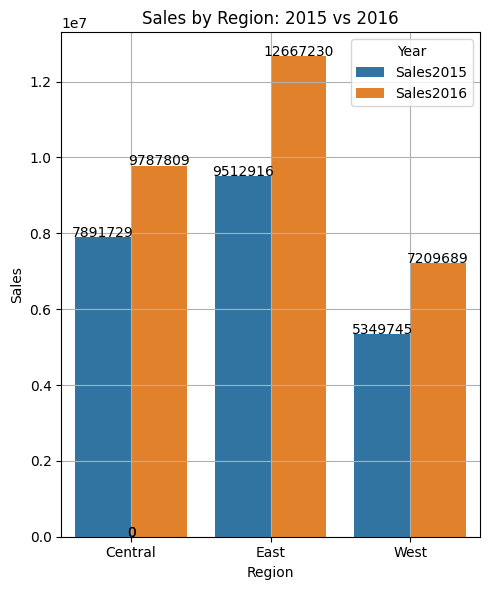

In [21]:
sales_by_region = data.groupby('Region')[['Sales2015', 'Sales2016']].sum().reset_index()

sales_by_region_long = pd.melt(sales_by_region, id_vars='Region', value_vars=['Sales2015', 'Sales2016'],
                               var_name='Year', value_name='Sales')

# Plot the data using a bar chart
plt.figure(figsize=(5, 6))

# Create a bar plot
bar_plot = sns.barplot(x='Region', y='Sales', hue='Year', data=sales_by_region_long)

# Set title and labels
bar_plot.set_title('Sales by Region: 2015 vs 2016')
bar_plot.set_xlabel('Region')
bar_plot.set_ylabel('Sales')
bar_plot.grid()
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 3), 
                      textcoords='offset points')
plt.tight_layout()
plt.show()


2. What are the contributing factors to the sales for each region in 2016. Visualize it using a
Pie Chart.

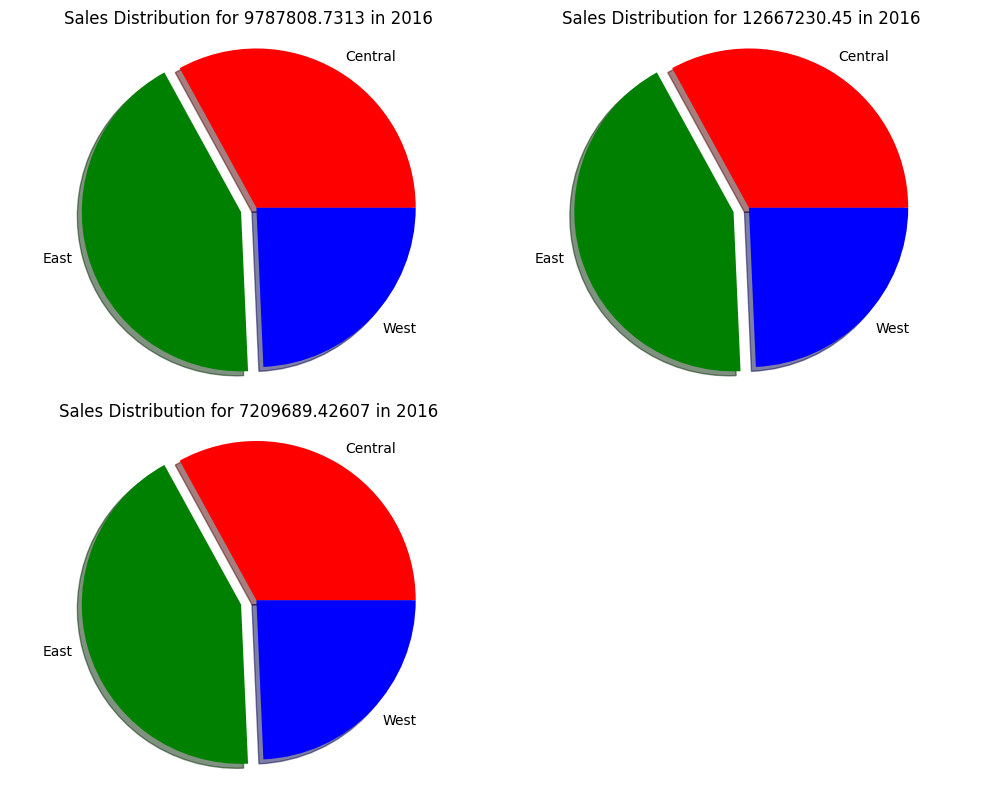

In [94]:
sales_pie = data.groupby("Region")["Sales2016"].sum()
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10.colors 
for i, region in enumerate(sales_pie):
    plt.subplot(2, 2, i+1)  
    plt.pie(sales_pie,labels=["Central","East","West"],shadow=True,explode=[0.0,0.1,0.0],colors=['r','g','b'])
    plt.title(f'Sales Distribution for {region} in 2016')
    plt.axis('equal') 

plt.tight_layout() 
plt.show()


3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

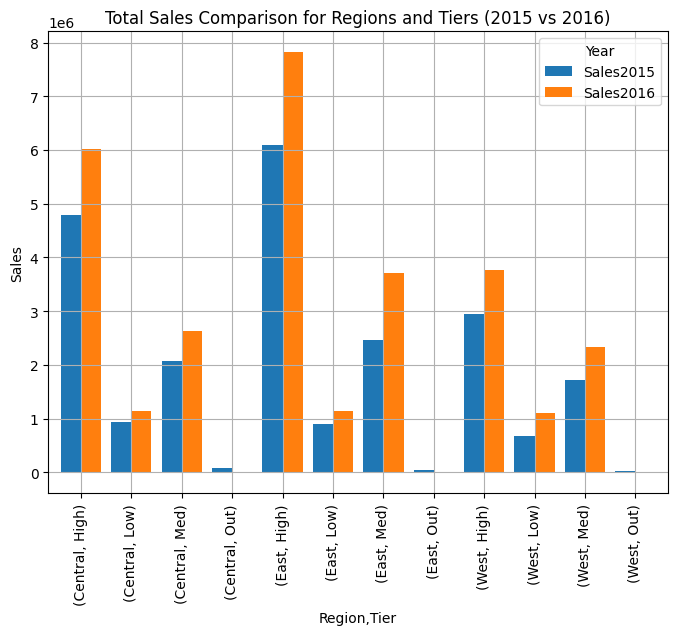

In [52]:
sales_comparison = data.groupby(['Region', 'Tier']).agg({'Sales2015': 'sum', 'Sales2016': 'sum'})

sales_comparison.plot(kind='bar', figsize=(8, 6),width=0.8)
plt.ylabel('Sales')
plt.title('Total Sales Comparison for Regions and Tiers (2015 vs 2016)')
plt.legend(title='Year')
plt.grid()
plt.show()


4. In East region, which state registered a decline in 2016 as compared to 2015?

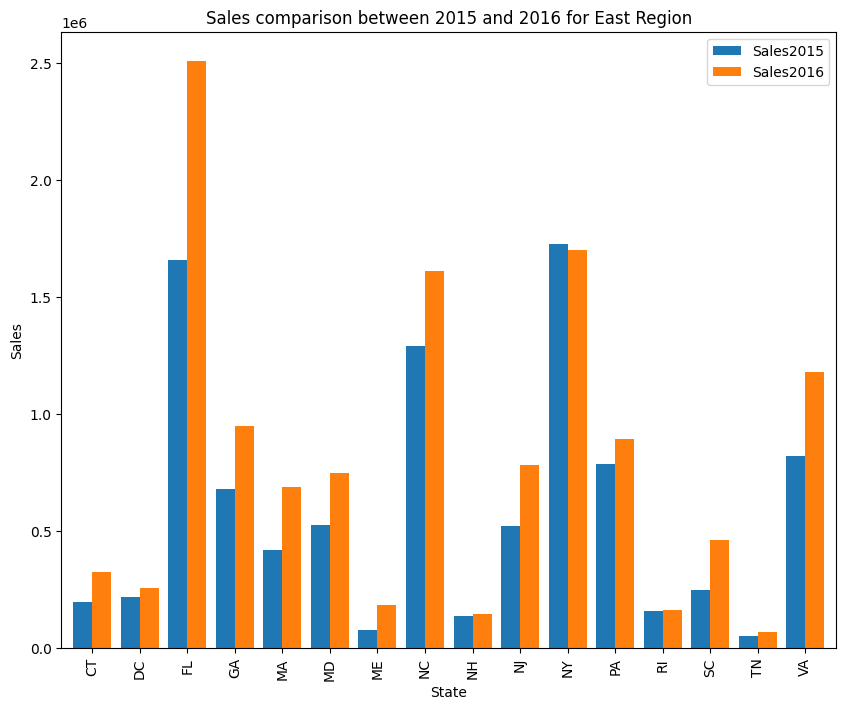

In East Region NY state registered a decline in sales in 2016


In [63]:
sales_state=data.groupby(['Region','State'])[['Sales2015','Sales2016']].sum()
sales_east = sales_state.loc["East"]
sales_east.plot(kind="bar",figsize=(10,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()
print("In East Region NY state registered a decline in sales in 2016")

5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared
to 2015?

<Axes: xlabel='Division'>

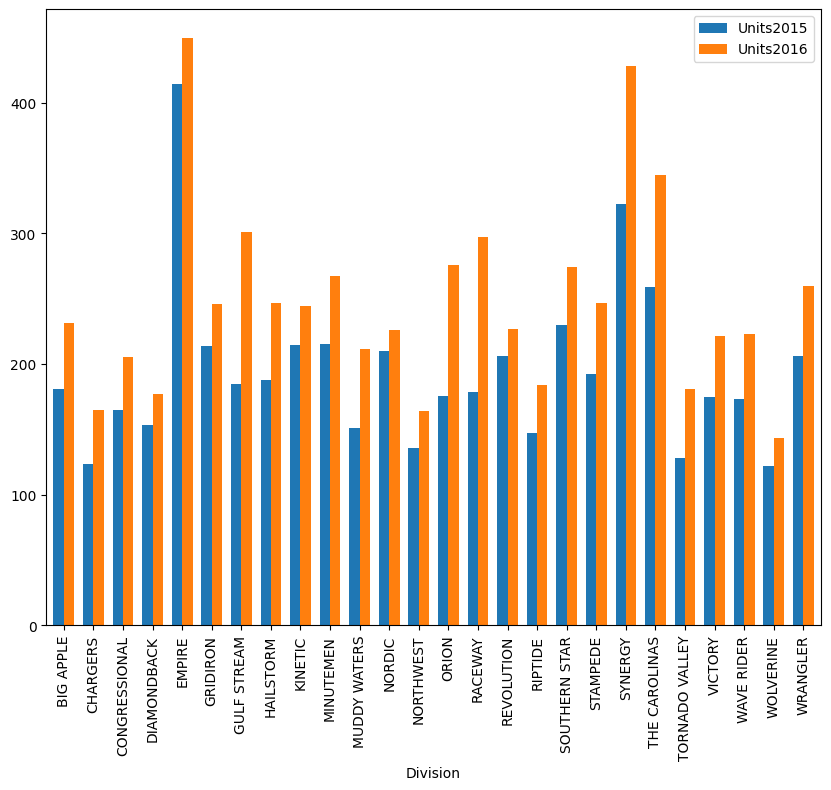

In [71]:
sales_division_tier = data.groupby(['Tier','Division'])[["Units2015","Units2016"]].sum()
high_tier= sales_division_tier.loc["High"]
high_tier.plot(kind="bar",figsize=(10,8),width=0.7)


6. Create a new column Qtr using numpy.where() or any suitable utility in the imported
dataset. The Quarters are based on months and defined as -\
• Jan - Mar : Q1\
• Apr - Jun : Q2\
• Jul - Sep : Q3\
• Oct - Dec : Q4

In [7]:
months_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3,
    'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9,
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['Month_Num'] = data['Month'].map(months_num)
data['Qtr']=np.where(data['Month_Num'].between(1, 3), 'Q1',
                 np.where(data['Month_Num'].between(4, 6), 'Q2',
                  np.where(data['Month_Num'].between(7, 9), 'Q3',
                   np.where(data['Month_Num'].between(10, 12), 'Q4',np.nan))))
data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr,Month_Num
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3,8
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4,10
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2,6
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1,3
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1,2
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3,8
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4,11
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1,1


7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

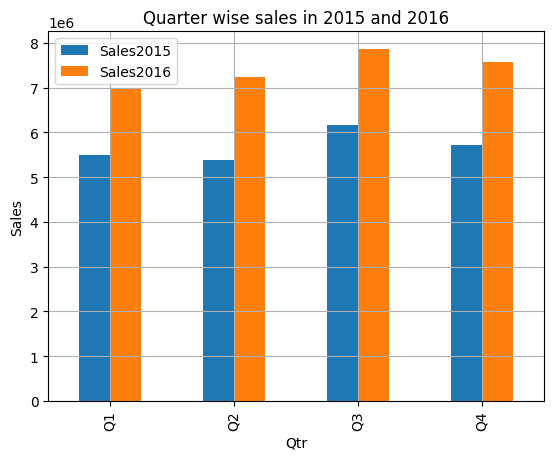

In [8]:
Qtr_sales = data.groupby("Qtr")[["Sales2015","Sales2016"]].sum()
Qtr_sales.plot(kind="bar")
plt.ylabel("Sales")
plt.title("Quarter wise sales in 2015 and 2016")
plt.grid()
plt.show()

8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a
pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

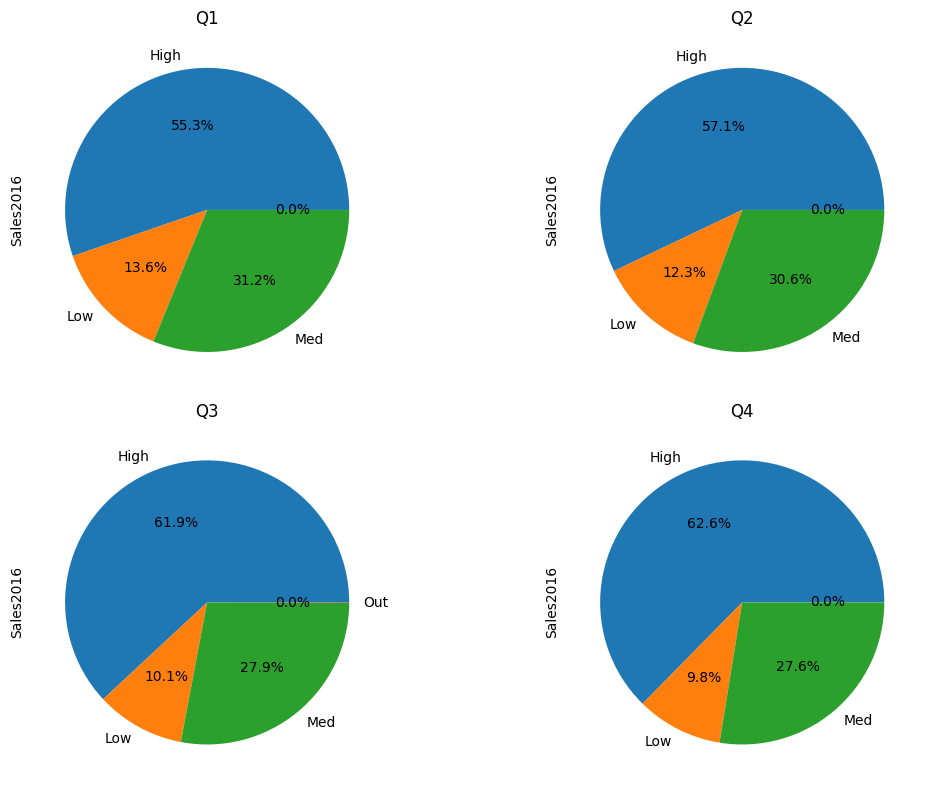

In [9]:
q1=data[data["Qtr"] == 'Q1']
q1s=q1.groupby('Tier')['Sales2016'].sum()
q2=data[data["Qtr"] == 'Q2']
q2s=q2.groupby('Tier')['Sales2016'].sum()
q3=data[data["Qtr"] == 'Q3']
q3s=q3.groupby('Tier')['Sales2016'].sum().abs()
q4=data[data["Qtr"] == 'Q4']
q4s=q4.groupby('Tier')['Sales2016'].sum()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

q1s.plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 0])
axs[0, 0].set_title('Q1')

q2s.plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 1])
axs[0, 1].set_title('Q2')

q3s.plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 0])
axs[1, 0].set_title('Q3')

q4s.plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 1])
axs[1, 1].set_title('Q4')

plt.tight_layout()
plt.show()
